In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from sklearn import preprocessing
import os


from ipywidgets import widgets
%matplotlib inline

In [3]:
def getFeatures(fileName):
    path = os.getcwd() + '/irc-sphere-sleep-56db93f64661/sphere-sensor-data/' + fileName
    
    if 'gz' in fileName:
        df = pd.read_csv(path, index_col='datetime', compression='gzip')
    else:
        df = pd.read_csv(path, index_col='datetime')

    # arm angle calculation using accelerometer data
    df['angle'] = 180 / np.pi * np.arctan(df['wearable-xl1-z'] / np.sqrt(np.square(df['wearable-xl1-x']) + np.square(df['wearable-xl1-z'])))

    # get only interesting columns
    df = df[['angle', 'wearable-mag-xl1']]

    # remove NaN values
    df = df.dropna()
    # convert index to DatetimeIndex
    df.index = pd.DatetimeIndex(df.index)


    # resample data within interval given in resampleInterval ('1S' = 1 second intervals)
    resampleInterval = '1S'
    minimum = df.resample(resampleInterval).min()
    maximum = df.resample(resampleInterval).max()
    mean = df.resample(resampleInterval).mean()
    std = df.resample(resampleInterval).std()
    summ = df.resample(resampleInterval).sum()
    skew = df.resample(resampleInterval).apply(lambda array : stats.skew(array))
    kurtosis = df.resample(resampleInterval).apply(lambda array: stats.kurtosis(array, fisher=True))

    # rename column labels in DataFrame
    minimum.rename(columns={'angle': 'angle min'}, inplace=True)
    minimum.rename(columns={'wearable-mag-xl1': 'magnitude min'}, inplace=True)
    
    maximum.rename(columns={'angle': 'angle max'}, inplace=True)
    maximum.rename(columns={'wearable-mag-xl1': 'magnitude max'}, inplace=True)
    
    mean.rename(columns={'angle': 'angle mean'}, inplace=True)
    mean.rename(columns={'wearable-mag-xl1': 'magnitude mean'}, inplace=True)
    
    std.rename(columns={'angle': 'angle std'}, inplace=True)
    std.rename(columns={'wearable-mag-xl1': 'magnutude std'}, inplace=True)
    
    summ.rename(columns={'angle': 'angle sum'}, inplace=True)
    summ.rename(columns={'wearable-mag-xl1': 'magnitude sum'}, inplace=True)
    
    skew.rename(columns={'angle': 'angle skew'}, inplace=True)
    skew.rename(columns={'wearable-mag-xl1': 'magnitude skew'}, inplace=True)
    
    kurtosis.rename(columns={'angle': 'angle kurtosis'}, inplace=True)
    kurtosis.rename(columns={'wearable-mag-xl1': 'magnitude kurtosis'}, inplace=True)
    
    # collect DataFrames
    features = [minimum, maximum, mean, std, summ, skew, kurtosis]
    features = pd.concat(features, axis=1)

    
    # for some weird reason new nans appear. 
    # need to drop them to have same shape on what to plot
    features = features.dropna()
    std = std.dropna()
    
    return [features, std, df]

In [4]:
# load features from data over a night
[features, std, df] = getFeatures('data_02.csv')
features

/Users/Andrew/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,angle min,magnitude min,angle max,magnitude max,angle mean,magnitude mean,angle std,magnutude std,angle sum,magnitude sum,angle skew,magnitude skew,angle kurtosis,magnitude kurtosis
datetime,,,,,,,,,,,,,,
2016-06-02 22:13:58,22.859250,-0.463627,33.030361,0.177312,28.854759,-0.189835,3.640377,0.226352,230.838075,-1.518684,-0.605520,0.329721,-1.105575,-1.175230
2016-06-02 22:13:59,-9.944248,-0.482232,24.754030,0.486497,9.470956,0.046617,8.498399,0.270547,189.419114,0.932341,-0.544464,-0.137403,-0.029219,-1.028425
2016-06-02 22:14:00,-44.736096,-0.429127,34.369830,0.503024,16.872243,-0.065731,22.571371,0.275611,337.444851,-1.314622,-2.044272,0.435070,3.057950,-0.817843
2016-06-02 22:14:01,-44.951943,-0.290679,-17.704064,0.147172,-39.785939,0.001544,7.132096,0.142252,-795.718771,0.030872,1.794272,-0.796109,2.595877,-0.873519
2016-06-02 22:14:02,-44.975562,-0.193387,43.491519,0.147632,-31.094833,-0.052463,22.117252,0.106876,-621.896663,-1.049255,2.346700,0.243469,4.887210,-1.089365
2016-06-02 22:14:03,-44.367414,-0.201997,30.963757,0.143248,-28.002740,-0.013308,20.930291,0.084392,-560.054792,-0.266158,2.271544,-0.286585,3.862914,0.388280
2016-06-02 22:14:04,-44.927105,-0.200278,39.533105,0.353669,-24.605935,-0.010902,22.414270,0.134303,-492.118697,-0.218044,1.489283,1.448048,1.645529,1.824784
2016-06-02 22:14:05,-28.938286,-0.196097,24.183153,0.234429,5.939529,-0.026311,16.782534,0.112534,118.790585,-0.526226,-0.900505,0.629992,-0.641801,0.180998
2016-06-02 22:14:06,-5.593684,-0.141991,22.710641,0.075773,9.289246,-0.004276,9.443753,0.061718,185.784911,-0.085515,-0.070533,-0.841868,-1.359254,0.138574


In [32]:
# normalise the values between a 0 1 range

features_array = features.values #return a numpy array
min_max_scalar = preprocessing.MinMaxScaler()
normalise = min_max_scalar.fit_transform(features_array)
normalised_features = pd.DataFrame(normalise)

# rename index and columns
normalised_features.columns = features.columns
normalised_features.index = features.index

normalised_features_backup = normalised_features.copy(deep=True)

normalised_features

,angle min,magnitude min,angle max,magnitude max,angle mean,magnitude mean,angle std,magnutude std,angle sum,magnitude sum,angle skew,magnitude skew,angle kurtosis,magnitude kurtosis
datetime,,,,,,,,,,,,,,
2016-06-02 22:13:58,0.753999,0.365381,0.866803,0.054307,0.820473,0.067199,0.082732,0.190947,0.573685,0.194328,0.420388,0.536417,0.045253,0.043403
2016-06-02 22:13:59,0.389512,0.350397,0.774705,0.115510,0.604932,0.331111,0.193144,0.228661,0.554216,0.331111,0.427673,0.478169,0.103874,0.052286
2016-06-02 22:14:00,0.002932,0.393167,0.881709,0.118781,0.687232,0.205716,0.512993,0.232982,0.623797,0.205716,0.248706,0.549553,0.272007,0.065028
2016-06-02 22:14:01,0.000534,0.504672,0.302236,0.048341,0.057211,0.280803,0.162091,0.119180,0.091139,0.280803,0.706747,0.396033,0.246842,0.061659
2016-06-02 22:14:02,0.000272,0.583030,0.983214,0.048432,0.153854,0.220525,0.502672,0.088992,0.172847,0.220525,0.772667,0.525662,0.371633,0.048599
2016-06-02 22:14:03,0.007029,0.576096,0.843806,0.047564,0.188237,0.264227,0.475695,0.069806,0.201916,0.264227,0.763699,0.459567,0.315847,0.138009
2016-06-02 22:14:04,0.000810,0.577481,0.939165,0.089217,0.226008,0.266912,0.509422,0.112397,0.233850,0.266912,0.670354,0.675865,0.195084,0.224929
2016-06-02 22:14:05,0.178465,0.580848,0.768352,0.065614,0.565664,0.249713,0.381425,0.093821,0.521016,0.249713,0.385188,0.573859,0.070511,0.125466
2016-06-02 22:14:06,0.437852,0.624425,0.751966,0.034208,0.602911,0.274308,0.214630,0.050456,0.552507,0.274308,0.484226,0.390327,0.031437,0.122899


In [5]:
# cluster and label data using K-means into n clusters
# label = KMeans(n_clusters=5, random_state=10).fit_predict(features)
# label

(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
                      angle std  magnutude std
 datetime                                     
 2016-06-02 22:13:58   3.640377       0.226352
 2016-06-02 22:13:59   8.498399       0.270547
 2016-06-02 22:14:00  22.571371       0.275611
 2016-06-02 22:14:01   7.132096       0.142252
 2016-06-02 22:14:02  22.117252       0.106876
 2016-06-02 22:14:03  20.930291       0.084392
 2016-06-02 22:14:04  22.414270       0.134303
 2016-06-02 22:14:05  16.782534       0.112534
 2016-06-02 22:14:06   9.443753       0.061718
 2016-06-02 22:14:07   4.108356       0.018467
 2016-06-02 22:14:08   1.312694       0.013199
 2016-06-02 22:14:09   1.679346       0.017414
 2016-06-02 22:14:10   2.415381       0.017236
 2016-06-02 22:14:11   1.478810       0.019970
 2016-06-02 22:14:12   2.970830       0.028885
 2016-06-02 22:14:13   1.209000       0.018142
 2016-06-02 22:14:14   1.124761       0.006481
 2016-06-02 22:14:15   1.812050       0.019625
 2016-06-02 22

<function __main__.plots>

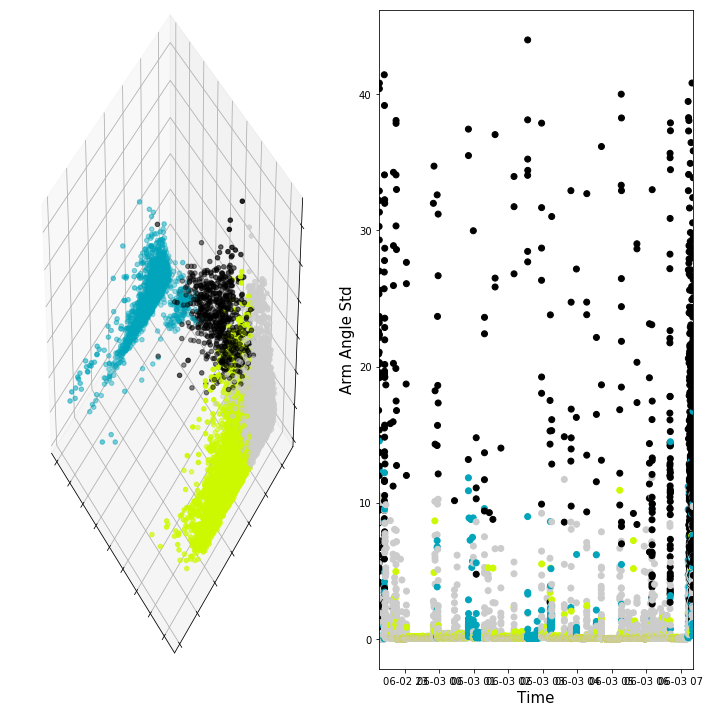

In [23]:
# make PCA (dimensionality reduction) to 3D and plot

def plots(weight):
    

    normalised_features['angle std'] = normalised_features['angle std'] * weight
    label = KMeans(n_clusters=4, random_state=10).fit_predict(normalised_features)

    # PCA PLOT #
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(121, projection='3d')
    
    pca = decomposition.PCA(n_components=3)
    pca.fit(normalised_features)
    X = pca.transform(normalised_features)

    # only needed for non int labels (I think)
    # y = np.choose(label, [1, 2, 0]).astype(np.float)

    pca_plot = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=label, cmap=plt.cm.spectral)
#     fig.colorbar(pca_plot, ax=ax1)
    # ticks
    ax1.w_xaxis.set_ticklabels([])
    ax1.w_yaxis.set_ticklabels([])
    ax1.w_zaxis.set_ticklabels([])
    
    # view perspective
    ax1.elev = 48
    ax1.azim = 134
    
    # reset angle std value
    normalised_features['angle std'] = normalised_features_backup['angle std']

    
#     #binary labels
#     labelReshape = label
#     labelReshape[labelReshape == 0] = 0
#     labelReshape[labelReshape == 1] = 1
#     labelReshape[labelReshape == 2] = 1 
#     labelReshape[labelReshape == 3] = 1
#     labelReshape[labelReshape == 4] = 1

    # STD PLOT #
    ax2 = fig.add_subplot(122)
    std_plot = ax2.scatter(std.index, std['angle std'], c=label, cmap=plt.cm.spectral)
    ax2.set_xlim(std.index[0], std.index[-1])
#     fig.colorbar(std_plot, ax=ax2)
    
    ax2.set_xlabel('Time', fontsize=15)
    ax2.set_ylabel('Arm Angle Std', fontsize=15)
    plt.tight_layout()
    
    # title
#     ax1.set_title("3 component PCA with normalised features")
    
    
    return label, std 

    
widgets.interact(plots, weight= widgets.IntSlider(min=1,max=5,step=1,value=1))

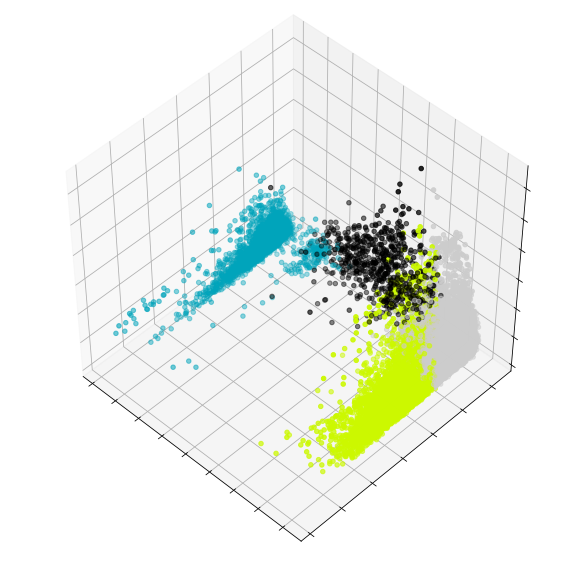

In [28]:
weight=1
normalised_features['angle std'] = normalised_features['angle std'] * weight
label = KMeans(n_clusters=4, random_state=10).fit_predict(normalised_features)

# PCA PLOT #
fig = plt.figure(figsize=(10, 10)) 
ax1 = fig.add_subplot(111, projection='3d')
    
pca = decomposition.PCA(n_components=3)
pca.fit(normalised_features)
X = pca.transform(normalised_features)

# only needed for non int labels (I think)
    # y = np.choose(label, [1, 2, 0]).astype(np.float)

pca_plot = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=label, cmap=plt.cm.spectral)
#     fig.colorbar(pca_plot, ax=ax1)
    # ticks
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])
    
    # view perspective
ax1.elev = 48
ax1.azim = 134

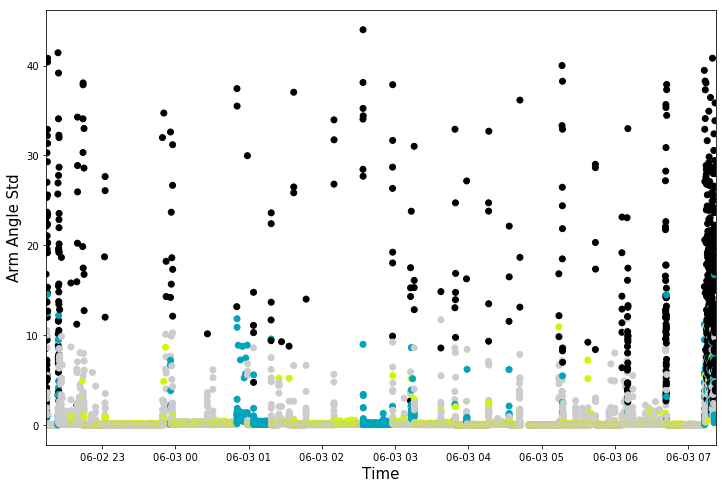

In [31]:
    # STD PLOT #
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
std_plot = ax2.scatter(std.index, std['angle std'], c=label, cmap=plt.cm.spectral)
ax2.set_xlim(std.index[0], std.index[-1])
#     fig.colorbar(std_plot, ax=ax2)
    
ax2.set_xlabel('Time', fontsize=15)
ax2.set_ylabel('Arm Angle Std', fontsize=15)
    

### standardisation plot is better? TODO couldnt achieve 0 mean

In [10]:
#standardise the features

scaled = preprocessing.scale(features)

### why can't I zero mean it?
# scaled_features.mean(axis=0)

scaled_features = pd.DataFrame(scaled)

# rename index and columns
scaled_features.columns = features.columns
scaled_features.index = features.index

scaled_features_backup = scaled_features.copy(deep=True)

(array([3, 3, 3, ..., 2, 3, 3], dtype=int32),
                      angle std  magnutude std  label
 datetime                                            
 2016-06-02 22:13:58   3.640377       0.226352      3
 2016-06-02 22:13:59   8.498399       0.270547      3
 2016-06-02 22:14:00  22.571371       0.275611      3
 2016-06-02 22:14:01   7.132096       0.142252      1
 2016-06-02 22:14:02  22.117252       0.106876      3
 2016-06-02 22:14:03  20.930291       0.084392      3
 2016-06-02 22:14:04  22.414270       0.134303      3
 2016-06-02 22:14:05  16.782534       0.112534      3
 2016-06-02 22:14:06   9.443753       0.061718      2
 2016-06-02 22:14:07   4.108356       0.018467      0
 2016-06-02 22:14:08   1.312694       0.013199      2
 2016-06-02 22:14:09   1.679346       0.017414      2
 2016-06-02 22:14:10   2.415381       0.017236      2
 2016-06-02 22:14:11   1.478810       0.019970      0
 2016-06-02 22:14:12   2.970830       0.028885      2
 2016-06-02 22:14:13   1.209000     

<function __main__.plots_2>

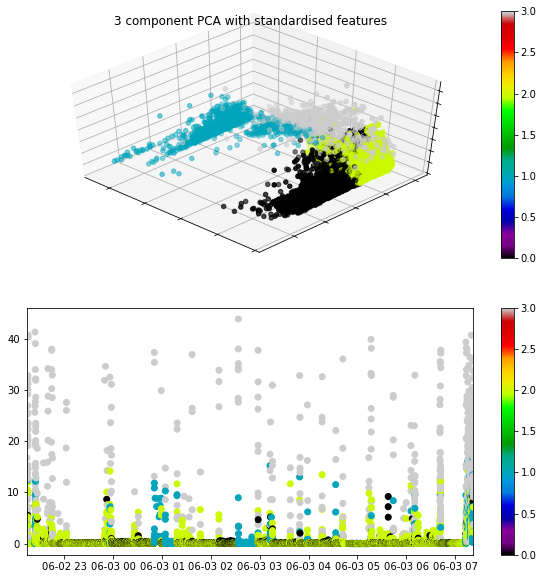

In [34]:
def plots_2(weight):
    

    scaled_features['angle std'] = scaled_features['angle std'] * weight
    label = KMeans(n_clusters=4, random_state=10).fit_predict(scaled_features)

    # PCA PLOT #
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(211, projection='3d')
    
    pca = decomposition.PCA(n_components=3)
    pca.fit(normalised_features)
    X = pca.transform(scaled_features)

    # only needed for non int labels (I think)
    # y = np.choose(label, [1, 2, 0]).astype(np.float)

    pca_plot = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=label, cmap=plt.cm.spectral)
    fig.colorbar(pca_plot, ax=ax1)
    # ticks
    ax1.w_xaxis.set_ticklabels([])
    ax1.w_yaxis.set_ticklabels([])
    ax1.w_zaxis.set_ticklabels([])
    
    # view perspective
    ax1.elev = 48
    ax1.azim = 134
    
    # reset angle std value
    scaled_features['angle std'] = scaled_features_backup['angle std']

    
#     #binary labels
#     labelReshape = label
#     labelReshape[labelReshape == 0] = 0
#     labelReshape[labelReshape == 1] = 1
#     labelReshape[labelReshape == 2] = 1 
#     labelReshape[labelReshape == 3] = 1
#     labelReshape[labelReshape == 4] = 1

    # STD PLOT #
    ax2 = fig.add_subplot(212)
    std_plot = ax2.scatter(std.index, std['angle std'], c=label, cmap=plt.cm.spectral)
    ax2.set_xlim(std.index[0], std.index[-1])
    fig.colorbar(std_plot, ax=ax2)
    
    # title
    ax1.set_title("3 component PCA with standardised features")

    
    return label, std 

    
widgets.interact(plots_2, weight= widgets.IntSlider(min=1,max=5,step=1,value=1))

# Test whether 0-1 normalisation or standardization is better

number of points below 10 normalised std 
 label 
 3    21090
2     7609
1     3118
0      669
Name: label, dtype: int64
number of points below 10 normalised std 
 label 
 2    20398
0     8191
1     3191
3      706
Name: label, dtype: int64


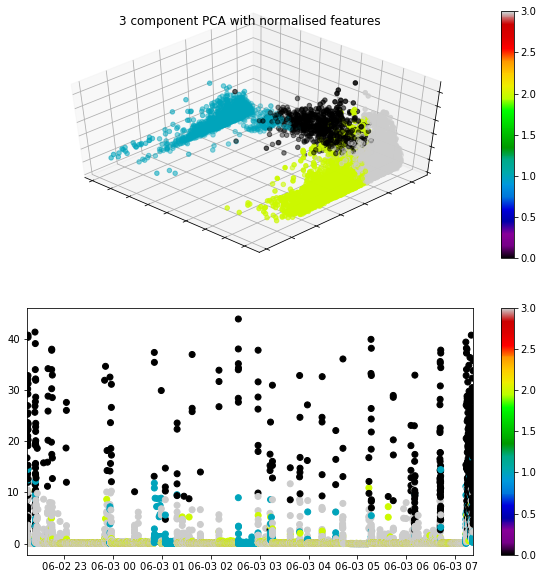

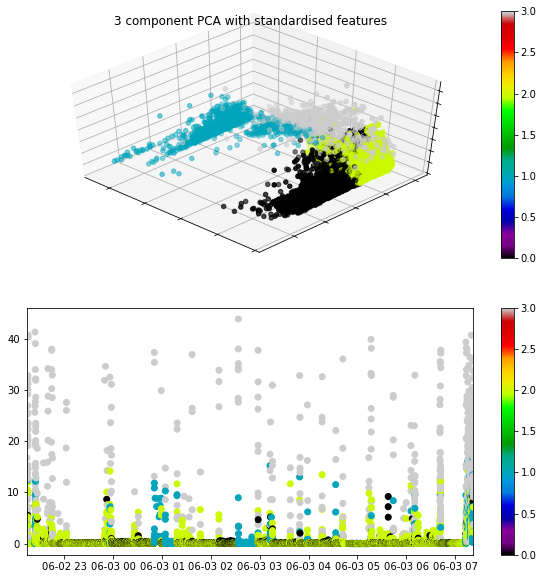

In [36]:
### count the number of labels with std below 10

weight = 1
label_norm, std_norm = plots(weight)

std_norm['label'] = label_norm

# std below 10
std_norm[std_norm['angle std'] <= 10]

#count the label different types of labels in this region
print("number of points below 10 normalised std \n" , "label \n", std_norm['label'].value_counts())


weight = 1
label_stan, std_stan = plots_2(weight)

std_stan['label'] = label_stan

# std below 10
std_stan[std_stan['angle std'] <= 10]

#count the label different types of labels in this region
print("number of points below 10 normalised std \n" , "label \n", std_stan['label'].value_counts())

# Does increasing the weight for angle std affect these results? 

number of points below 10 normalised std 
 label 
 0    21184
3     7616
1     3168
2      518
Name: label, dtype: int64
number of points below 10 normalised std 
 label 
 1    21173
3     7610
0     3158
2      545
Name: label, dtype: int64
number of points below 10 normalised std 
 label 
 2    21124
3     7610
1     3128
0      624
Name: label, dtype: int64
number of points below 10 normalised std 
 label 
 3    21090
2     7609
1     3118
0      669
Name: label, dtype: int64


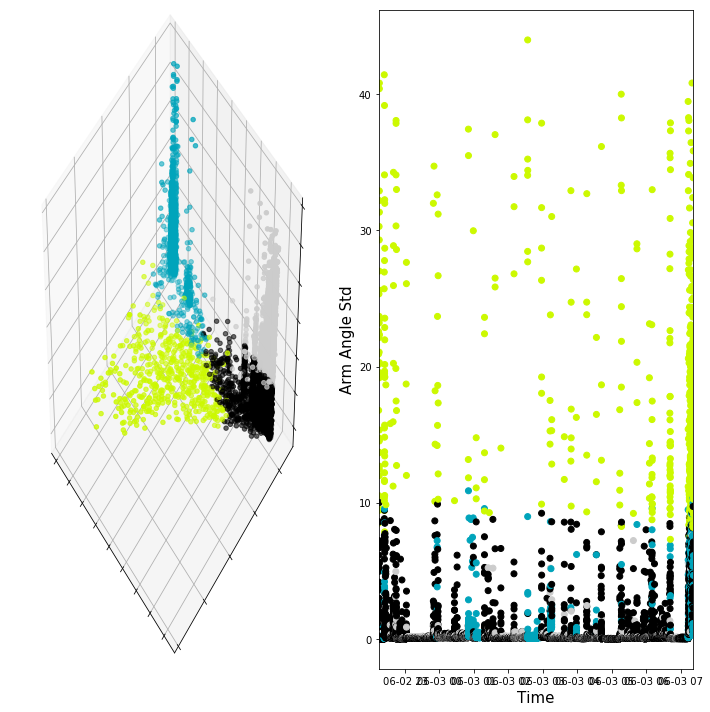

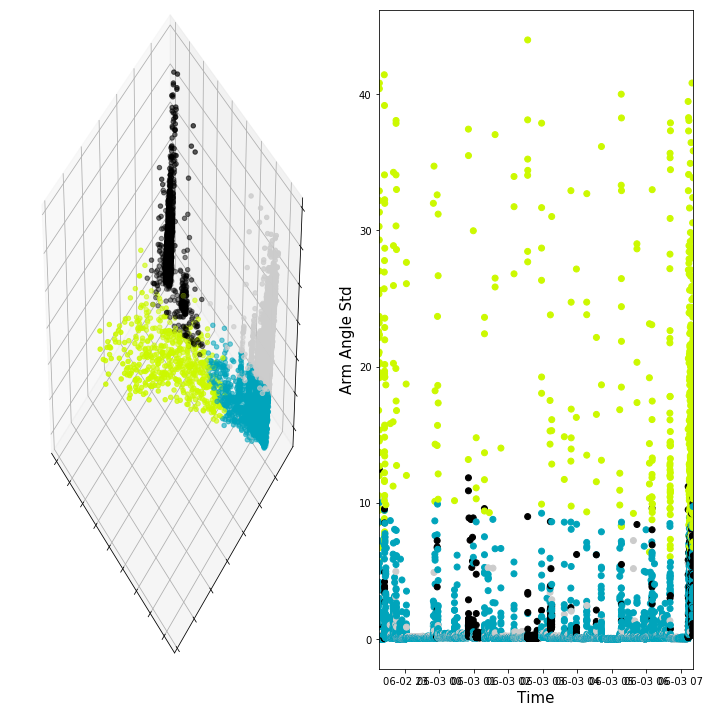

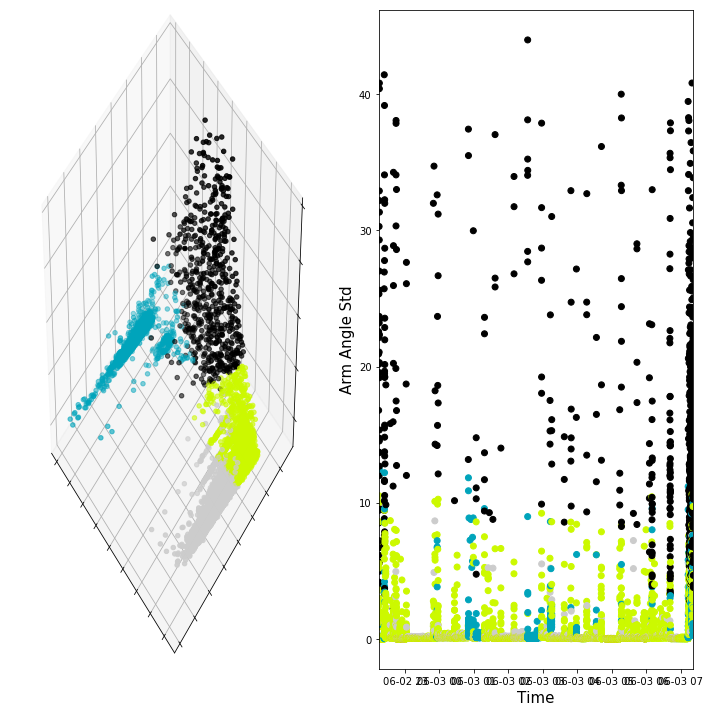

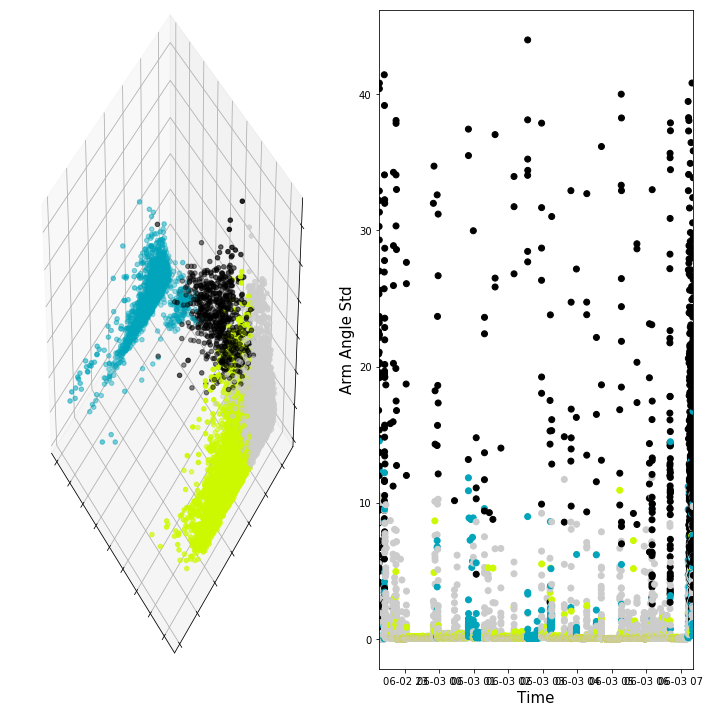

In [35]:
### count the number of labels with std below 10

weight = 4
label_norm, std_norm = plots(weight)

std_norm['label'] = label_norm

# std below 10
std_norm[std_norm['angle std'] <= 10]

#count the label different types of labels in this region
print("number of points below 10 normalised std \n" , "label \n", std_norm['label'].value_counts())

weight = 3
label_norm, std_norm = plots(weight)

std_norm['label'] = label_norm

# std below 10
std_norm[std_norm['angle std'] <= 10]

#count the label different types of labels in this region
print("number of points below 10 normalised std \n" , "label \n", std_norm['label'].value_counts())


weight = 2
label_norm, std_norm = plots(weight)

std_norm['label'] = label_norm

# std below 10
std_norm[std_norm['angle std'] <= 10]

#count the label different types of labels in this region
print("number of points below 10 normalised std \n" , "label \n", std_norm['label'].value_counts())


weight = 1
label_stan, std_stan = plots(weight)

std_stan['label'] = label_stan

# std below 10
std_stan[std_stan['angle std'] <= 10]

#count the label different types of labels in this region
print("number of points below 10 normalised std \n" , "label \n", std_stan['label'].value_counts())

need to see which are majority above threshold and we want to keep these out of the low movement region

## w=1
number of points below 10 normalised std 
 label 
 3    21090
2     7609
1     3118
0      669 <<<<
Name: label, dtype: int64
number of points below 10 standardised std 
 label 
 2    20398
0     8191
1     3191
3      706 <<<<
Name: label, dtype: int6

##  w=2 
number of points below 10 normalised std 
 label 
 2    21124
3     7610
1     3128
0      624 <<<<
Name: label, dtype: int64
number of points below 10 standardised std 
 label 
 2    20398
0     8191
1     3191
3      706 <<<<
Name: label, dtype: int64


## Conclusion

Note: making sure to check what is the majority label is above 10 std, and mark this label for each test.

Looking at the marked labels and majority label under 10 std shows:
* normalised features are better.
* w=2 is better than w=1

How about w=3?



